<h1 style='text-align: center;'> image compression </h1>

<h2> requirements </h2>
python version > 3.8 <br>
numpy version 1.24 <br>
matplotlib version 3.9

In [100]:
import os
import numpy as np
from matplotlib.image import imread as image_read
import matplotlib.pyplot as plt

<h2> computational functions </h2>

In [101]:
def img_to_float(img):
    # this function returns a matrix where the data types (image) has been changed to the double type
    info = np.iinfo(img.dtype)
    return img.astype(np.double) / info.max


def svd(img_matrix, full_matrices=False):
    # this function is used to compute the factor of an array by Singular Value Decomposition
    U, S, VT = np.linalg.svd(img_matrix, full_matrices=full_matrices)
    return (U, np.diag(S), VT)


def percentage_of_storage(rank, n_rows, n_cols):
    # this function is used to compute the percentage of use storage according to rank of matrix 
    original_space = n_rows*n_cols
    compressed_space = n_rows*rank + rank + n_cols*rank
    return compressed_space / original_space * 100


def percentage_of_energy(S, r):
    # this function is used to compute the percentage of use energy (efficiency ratio)
    return np.trace(S[:r]) / np.trace(S) * 100


def frobenious_norm(A, B):
    # this function is used to compute the The Frobenius norm of matrix A - B
    return np.linalg.norm(A-B, ord='fro')


def optimal_rank_by_storage(X, max_storage):
    # this function is used to compute the The optimal rank for matrix X according to percentage of use storage in matrix S (Singular Values Decomposition) in SVD
    U, S, VT = svd(X)
    opt_rank = 1
    
    while True:
        storage = percentage_of_storage(opt_rank, *S.shape)
        if storage < max_storage:
            opt_rank += 1
            continue
        if storage > max_storage:
            opt_rank -= 1
        
        break

    return opt_rank


def optimal_rank_by_energy(X, max_energy):
    # this function is used to compute the The optimal rank for matrix X according to percentage of use energy in matrix S (Singular Values Decomposition) in SVD
    U, S, VT = svd(X)
    opt_rank = 1
    
    while True:
        energy = percentage_of_energy(S, opt_rank)
        if energy < max_energy:
            opt_rank += 1
            continue
        if energy > max_energy:
            opt_rank -= 1
        
        break
        
    return opt_rank


def optimal_rank_by_norm(X, max_norm):
    # this function is used to compute the The optimal rank for matrix X according to frobenious norm in matrix S (Singular Values Decomposition) in SVD
    U, S, VT = svd(X)
    opt_rank = 1
    
    while True:
        X_r = U[:, :opt_rank] @ S[:opt_rank, :opt_rank] @ VT[:opt_rank, :]  

        norm = frobenious_norm(X, X_r)
        if norm > max_norm:
            opt_rank += 1
            continue
        
        break
        
    return opt_rank


def optimal_rank(X, by='energy', max_energy='100', max_storage='100', max_norm='100'):
    # this function return optimal rank by input parameter 
        
    if by == 'energy':
        if len(X.shape) == 3:
            opt_rank = np.mean(
                [
                    optimal_rank_by_energy(X[:, :, 0], max_energy),
                    optimal_rank_by_energy(X[:, :, 1], max_energy),
                    optimal_rank_by_energy(X[:, :, 2], max_energy),
                ]
            )
        else:
            opt_rank = optimal_rank_by_energy(X, max_energy)
            
    elif by == 'storage':
        if len(X.shape) == 3:
            opt_rank = np.mean(
                [
                    optimal_rank_by_storage(X[:, :, 0], max_storage),
                    optimal_rank_by_storage(X[:, :, 1], max_storage),
                    optimal_rank_by_storage(X[:, :, 2], max_storage),
                ]
            )
        else:
            opt_rank = optimal_rank_by_storage(X, max_storage)

    else:
        if len(X.shape) == 3:
            opt_rank = np.mean(
                [
                    optimal_rank_by_norm(X[:, :, 0], max_norm),
                    optimal_rank_by_norm(X[:, :, 1], max_norm),
                    optimal_rank_by_norm(X[:, :, 2], max_norm),
                ]
            )
        else:
            opt_rank = optimal_rank_by_norm(X, max_norm)

    return int(opt_rank)

<h2> convert image to a matrix </h2>

matrix shape of original image : (225, 300, 3)
rank = 186


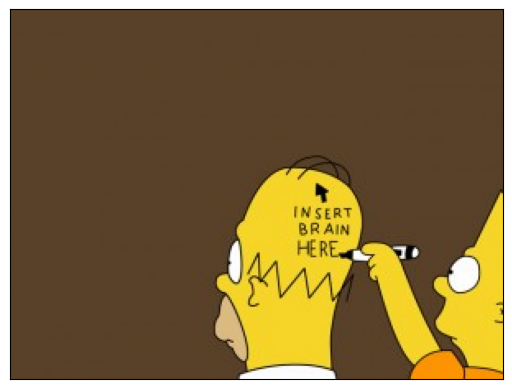

In [102]:
picture_name = 'brain'
img_path = os.path.join('pictures', f'{picture_name}.jpg')
img = image_read(img_path)
img_matrix = img_to_float(img)
matrix_mean = np.mean(img, -1)

print(f'matrix shape of original image : {img_matrix.shape}')
print(f'rank = {np.linalg.matrix_rank(matrix_mean)}')

ax = plt.subplot(1,1,1)
ax.imshow(img_matrix)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

<h2> optimal rank according to different parameters </h2>

In [103]:
max_energy=85
max_storage=30
max_norm=30

opt_rank_by_storage = optimal_rank(img_matrix, by='storage', max_storage=max_storage)
opt_rank_by_energy = optimal_rank(img_matrix, by='energy', max_energy=max_energy)
opt_rank_by_norm = optimal_rank(img_matrix, by='norm', max_norm=max_norm)

print(f'optimum rank for {max_energy}% energy is {opt_rank_by_energy}')
print(f'optimum rank for {max_storage}% storage is {opt_rank_by_storage}')
print(f'optimum rank for frob_norm = {max_norm} is {opt_rank_by_norm}')

optimum rank for 85% energy is 43
optimum rank for 30% storage is 33
optimum rank for frob_norm = 30 is 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.733626685071712e-15..1.0000000000000062].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.1499581568765764e-05..1.000021006753174].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.023632992160717185..1.0322411178789].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06444657514604521..1.0967589894605119].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2392024491021548..1.326292653139218].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10442452655492013..1.161024075525566].
Clipping input da

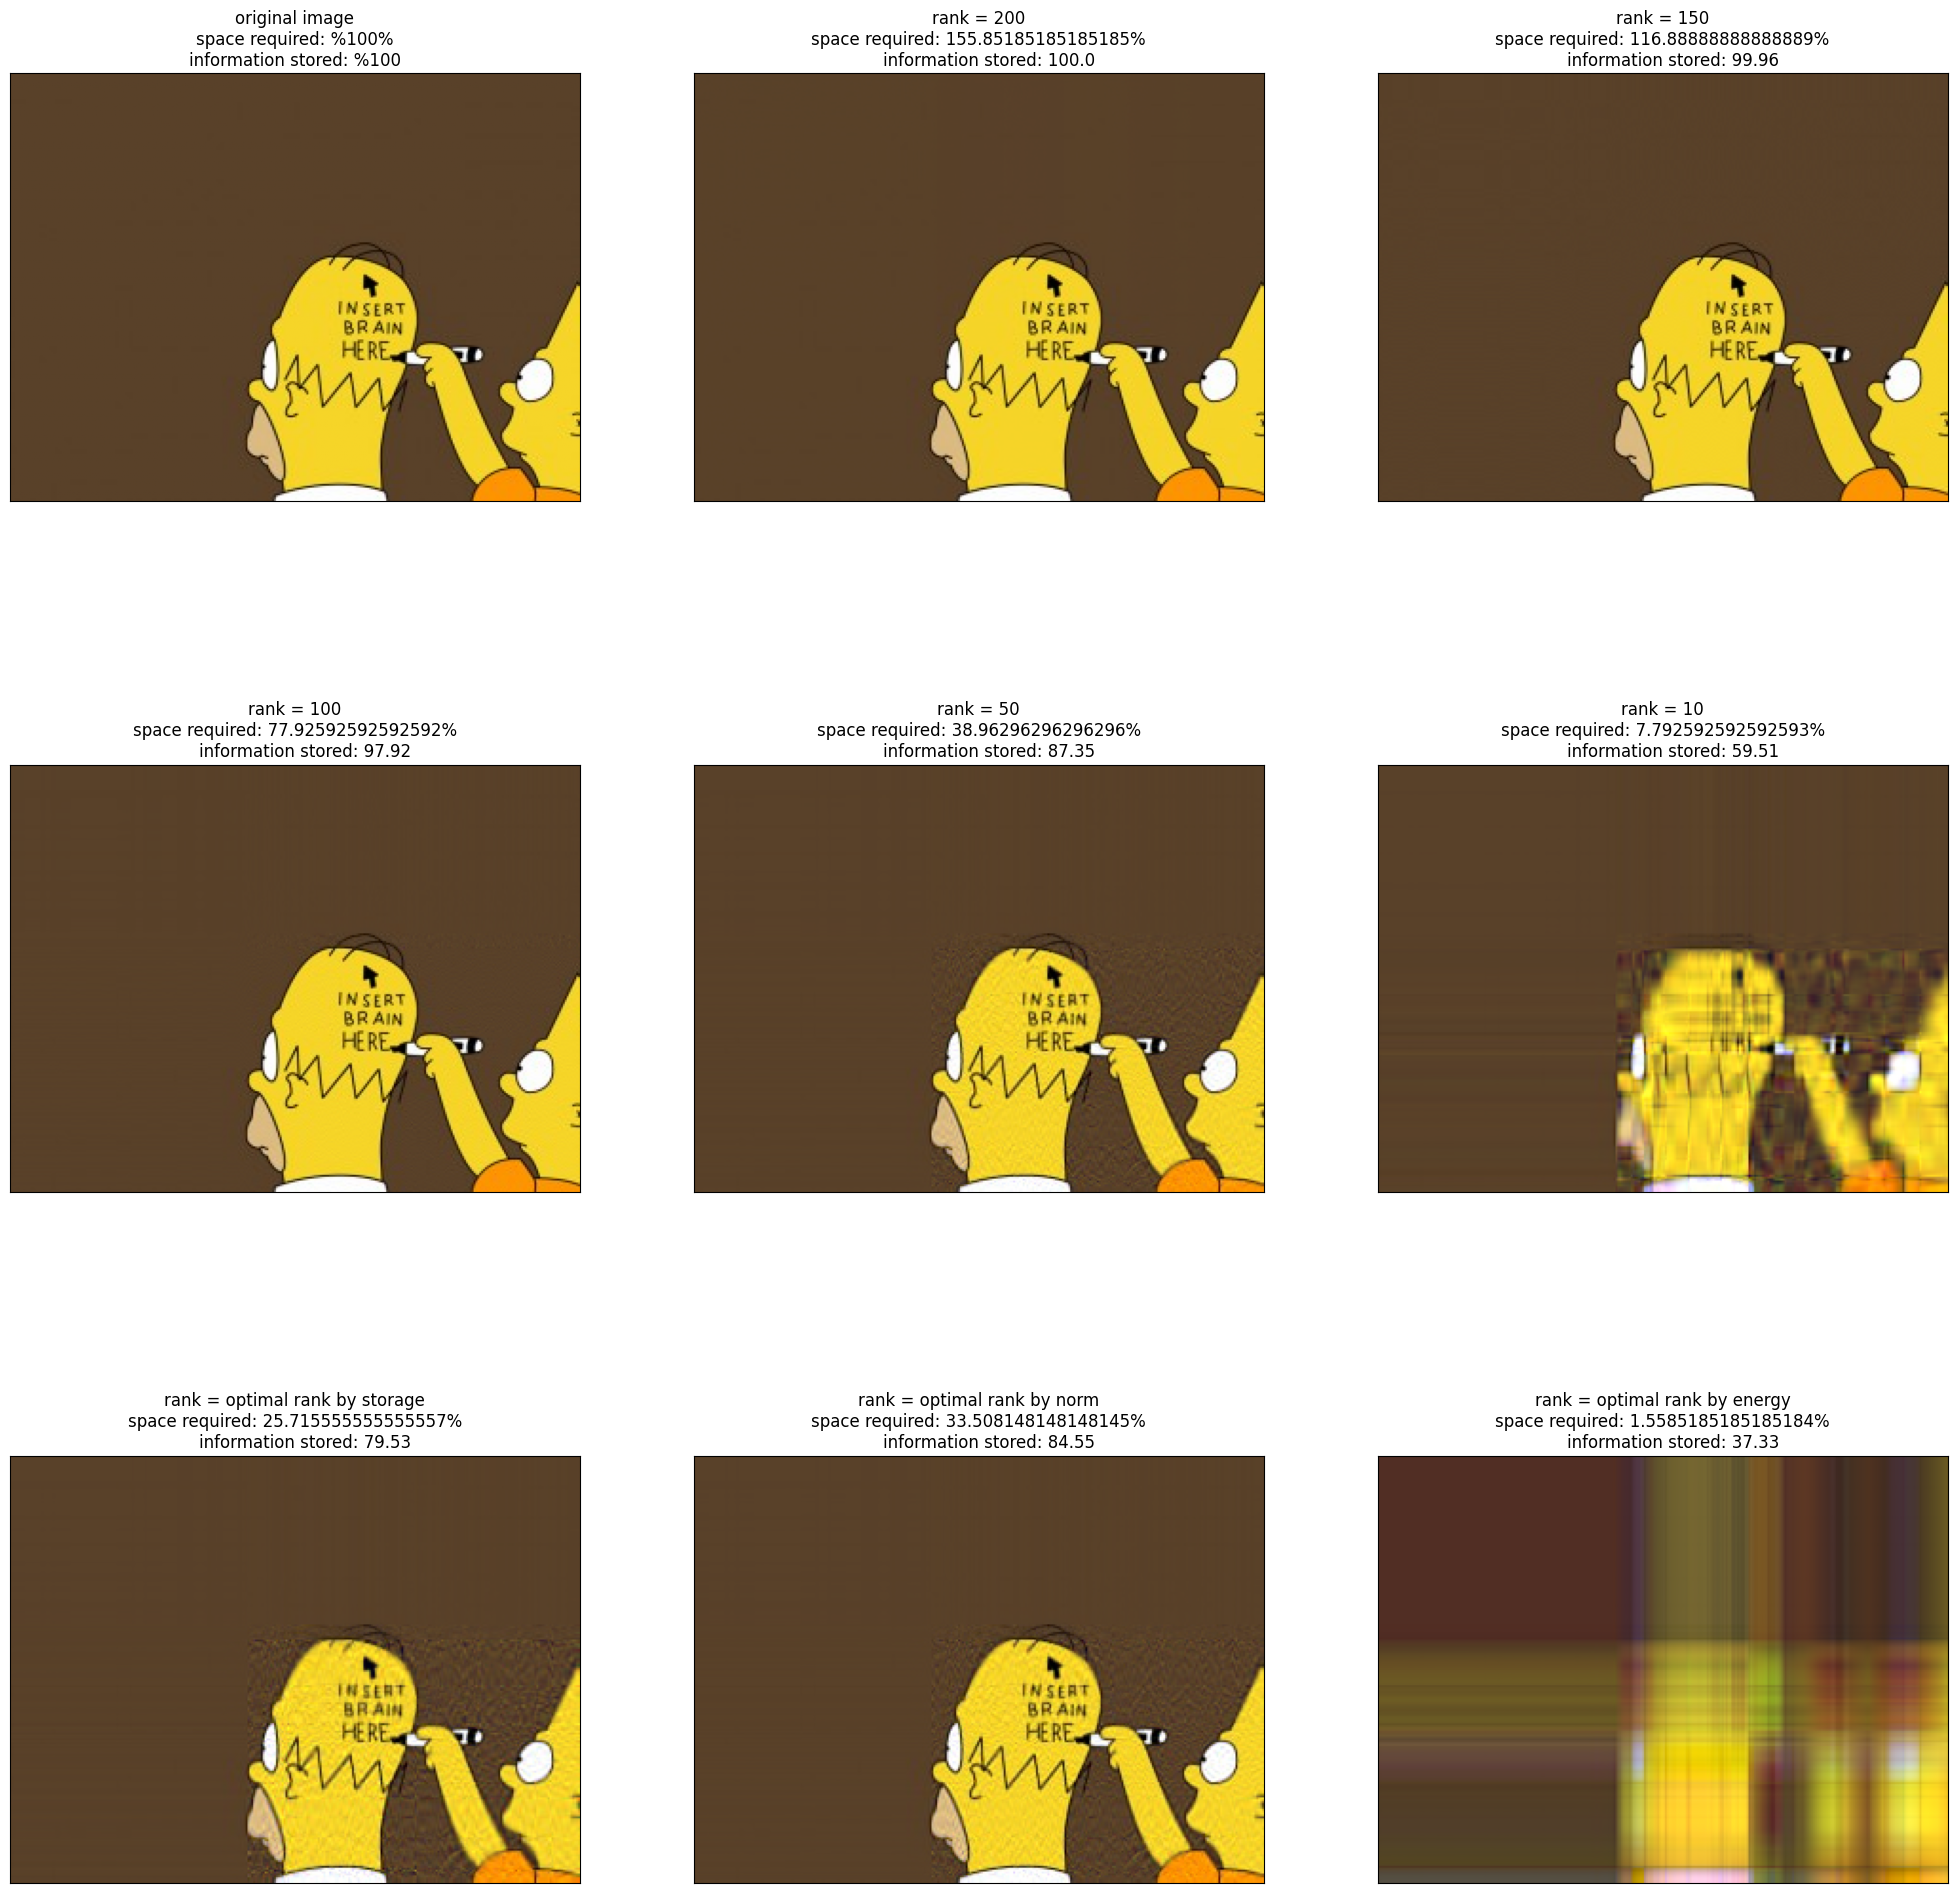

In [104]:
opt = ['optimal rank by norm', 'optimal rank by energy', 'optimal rank by storage']
RANKS = [200, 150, 100, 50, 10, opt_rank_by_storage, opt_rank_by_energy, opt_rank_by_norm]
n_rows, n_cols = img_matrix.shape[:2]
red_channel, green_channel, blue_channel =  img_matrix[:, :, 0], img_matrix[:, :, 1], img_matrix[:, :, 2]

U_R, S_R, VT_R = svd(red_channel)
U_G, S_G, VT_G = svd(green_channel)
U_B, S_B, VT_B = svd(blue_channel)
    
fig = plt.figure(0, (25, 22))
fig.subplots_adjust(top=1)

ax = plt.subplot(3, 3, 1)
ax.imshow(img_matrix)
ax.set_title(f'''original image\nspace required: %100%
information stored: %100''')
ax.set_xticks([])
ax.set_yticks([])

for idx, r in enumerate(RANKS):
    XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
    XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
    XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

    X_r = np.dstack((XR_r, XG_r, XB_r))
    
    info_stored = np.mean(
        [
            percentage_of_energy(S_R, r),
            percentage_of_energy(S_G, r),
            percentage_of_energy(S_B, r),
        ]
    )
    
    ax = plt.subplot(3,3, idx+2)
    ax.imshow(X_r)

    ax.set_xticks([])
    ax.set_yticks([])
        
    ax.set_title(f'''rank = {r if idx + 2 < 7 else opt[idx - 7 + 1]}\nspace required: {percentage_of_storage(r, n_rows, n_cols)}%
    information stored: {round(info_stored, 2)}''')

mohammad majooni <br> 
github repositorie : https://github.com/mohammad-majoony/image-compression